## Домашнее задание "Временные ряды, общая теория" (Знакомство с временными рядами)

Преподаватель: Даниил Корбут, Наталья Баданина

Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

Решением будет ссылка на гитхаб с ноутбуком.


In [105]:
import pandas as pd
import numpy as np

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt

import matplotlib.pyplot as plt
%matplotlib inline

In [106]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
airlines_passengers = pd.read_csv("international-airline-passengers.csv")
car_sales = pd.read_csv("monthly-car-sales-in-quebec-1960.csv")

In [107]:
airlines_passengers.columns = ['Month', 'Count']

# Отображение графика

In [108]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"][:-1],
    "Monthly car sales in Quebec 1960": car_sales["Count"],
}

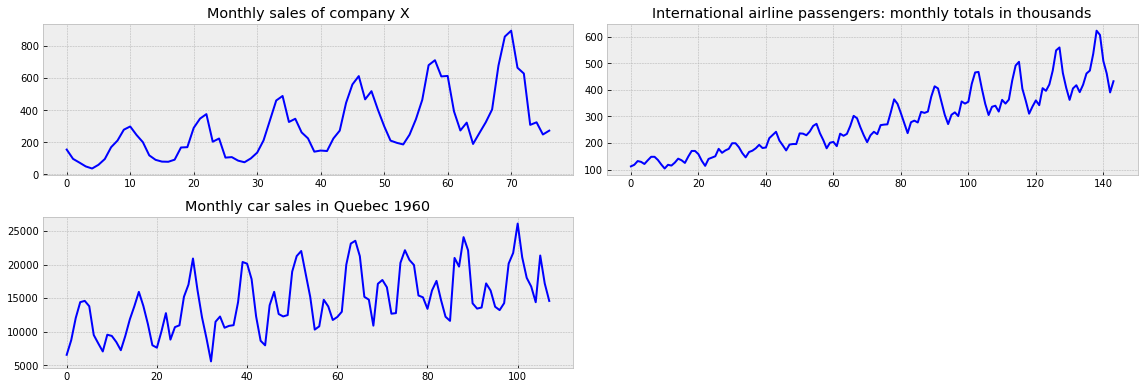

In [109]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

Визуально понянто, что во всех временных рядах есть тренд и цикличность, то есть эти ряды не стационарные

# Нормализуем дисперсию

In [110]:
from scipy.stats import boxcox

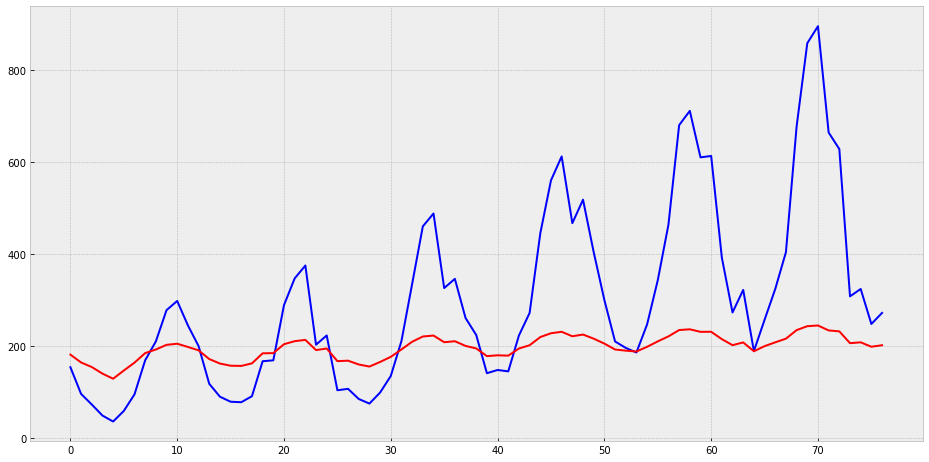

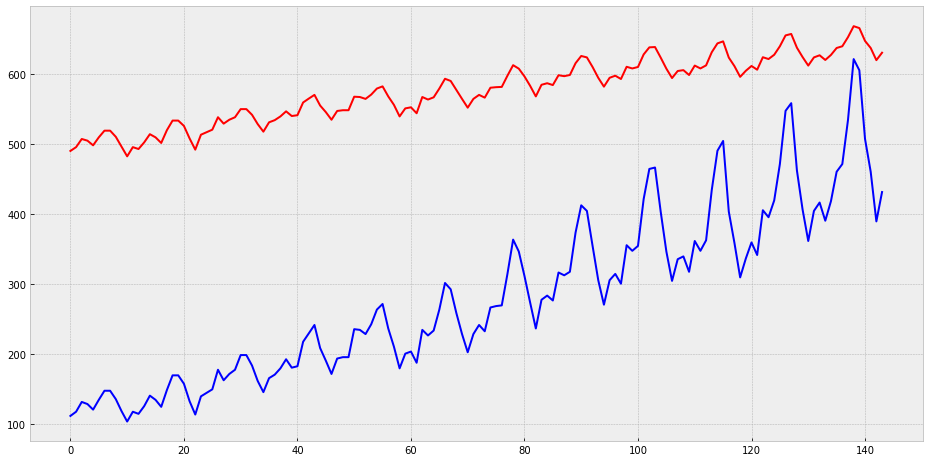

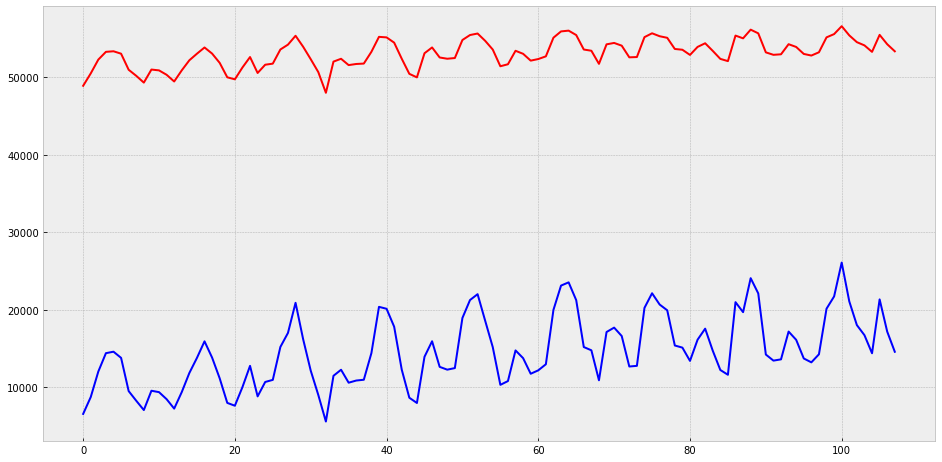

In [111]:
for s in all_series:
    series = boxcox(all_series[s], 0)
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(all_series[s], color='blue')
        plt.plot(series * all_series[s].min(), color='red')

# Дифференцируем 

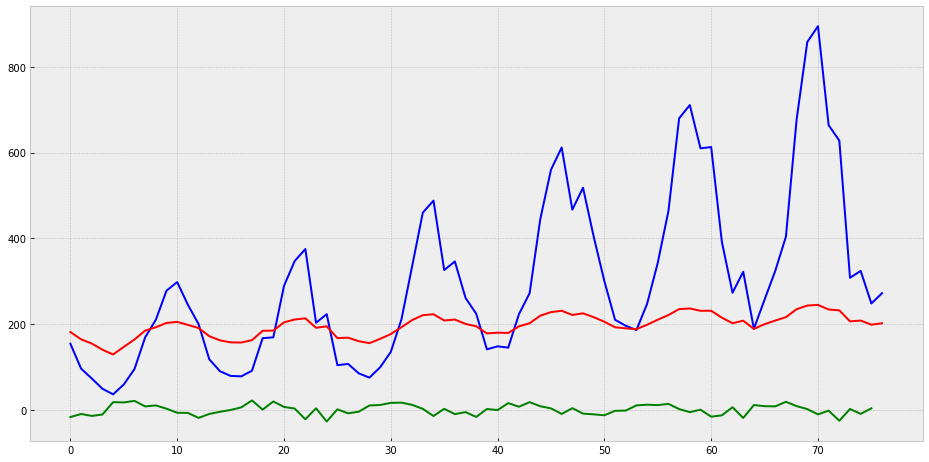

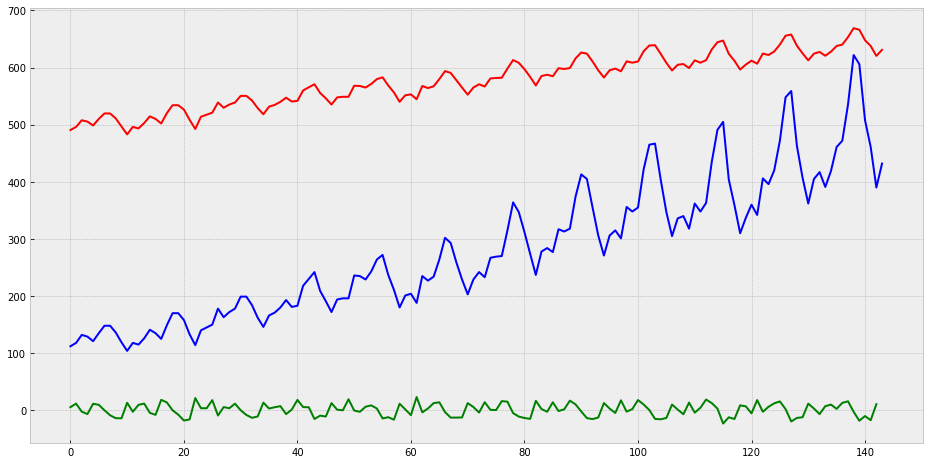

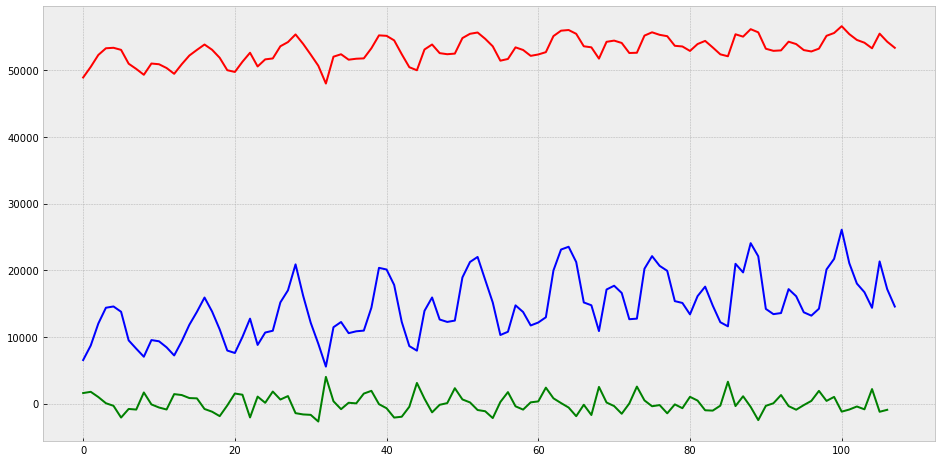

In [112]:
for s in all_series:
    series = boxcox(all_series[s], 0)
    series_diff = np.diff(series, 1)
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(all_series[s], color='blue')
        plt.plot(series * all_series[s].min(), color='red')
        plt.plot(series_diff * all_series[s].min(), color='green')

## Проверяем на стационарность. Тест Дики-Фуллера 

In [113]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries, s):
    print(s)
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput, '\n', '\n')

In [114]:
for s in all_series:
    test_stationarity(all_series[s], s)

Monthly sales of company X
Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64 
 

International airline passengers: monthly totals in thousands
Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64 
 

Monthly car sales in Quebec 1960
Results of Dickey-Fuller Test:
Test Statistic                 -1.223813
p-value                         0.663269
#Lags Used                     12.000000
Number of Observations Used    95.000000
Cr

Тест Дики-Фуллера и графики сырых данных не отвергают гипотезу о нестационарности ряда

In [115]:
for s in all_series:
    series = boxcox(all_series[s], 0)
    series_diff = np.diff(series, 1)
    test_stationarity(series_diff, s)

Monthly sales of company X
Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64 
 

International airline passengers: monthly totals in thousands
Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64 
 

Monthly car sales in Quebec 1960
Results of Dickey-Fuller Test:
Test Statistic                 -4.193835
p-value                         0.000675
#Lags Used                     12.000000
Number of Observations Used    94.000000
Cr

Тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда.

Для 'International airline passengers' применим немного другие преобразования

In [116]:
series = all_series['International airline passengers: monthly totals in thousands']
series = boxcox(series, 1)
series_diff = np.diff(series, 2)
test_stationarity(series_diff, 'International airline passengers: monthly totals in thousands')

International airline passengers: monthly totals in thousands
Results of Dickey-Fuller Test:
Test Statistic                -1.638423e+01
p-value                        2.732892e-29
#Lags Used                     1.100000e+01
Number of Observations Used    1.300000e+02
Critical Value (1%)           -3.481682e+00
Critical Value (5%)           -2.884042e+00
Critical Value (10%)          -2.578770e+00
dtype: float64 
 



# Коррелограммы

In [117]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

/home/dmi/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


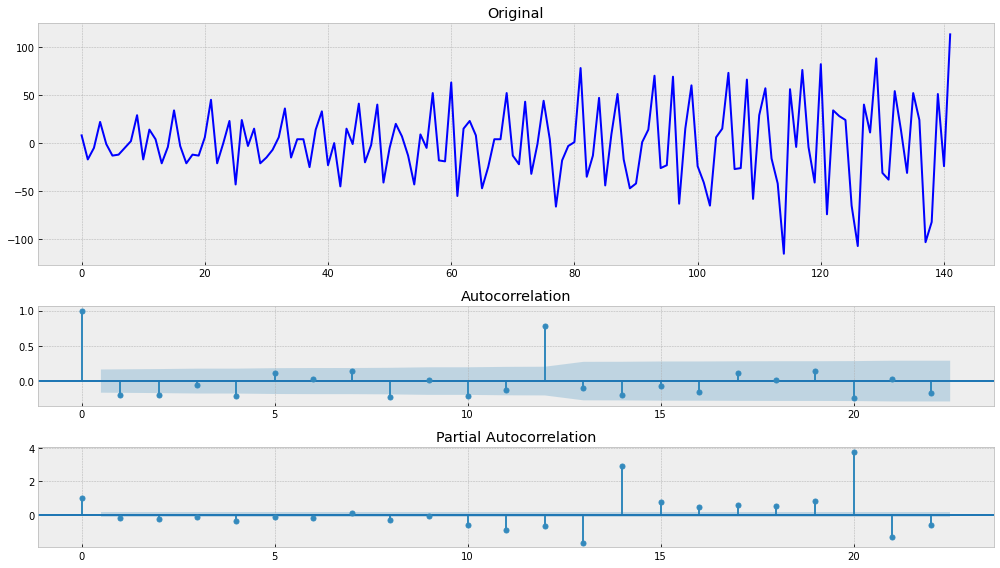

In [118]:
tsplot(series_diff)

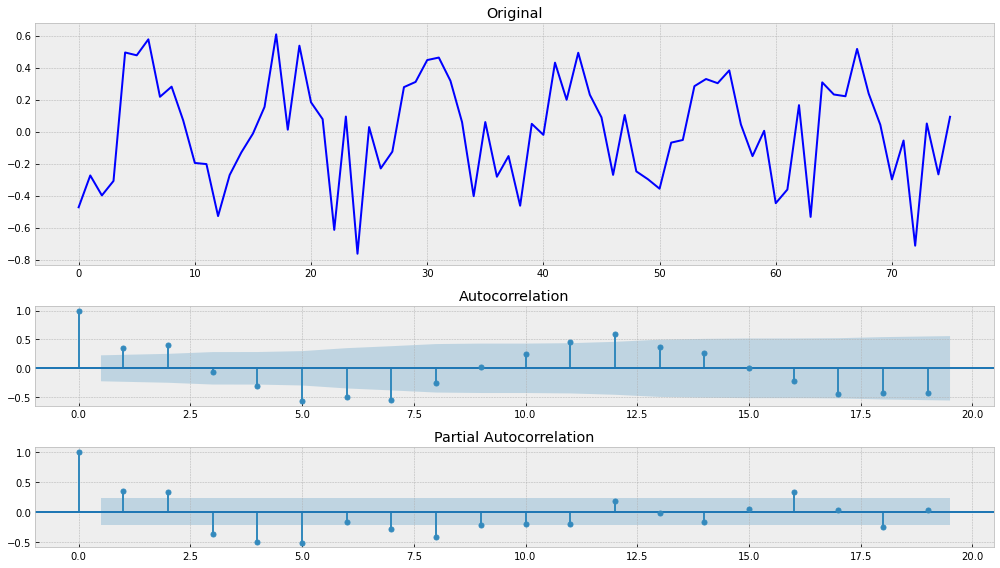

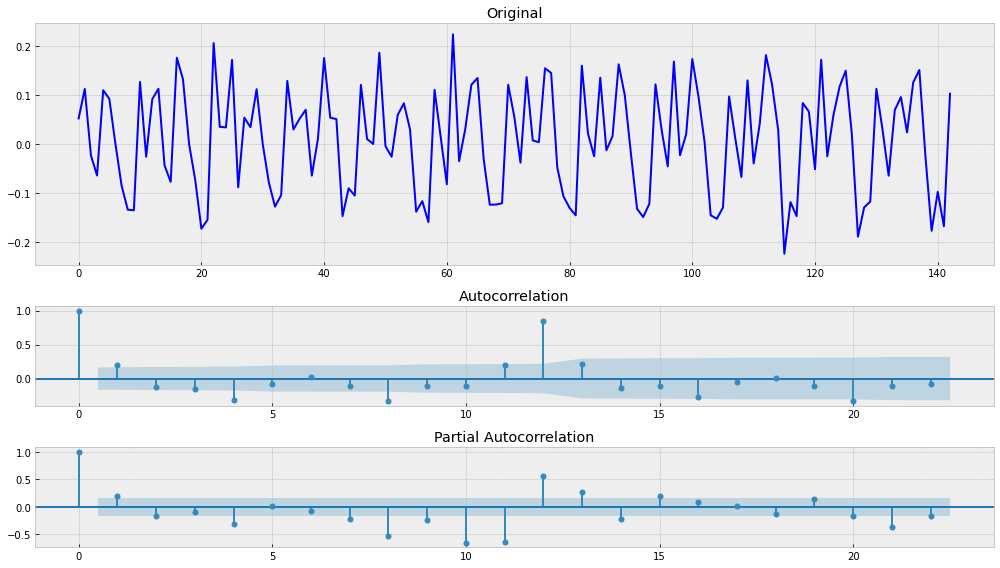

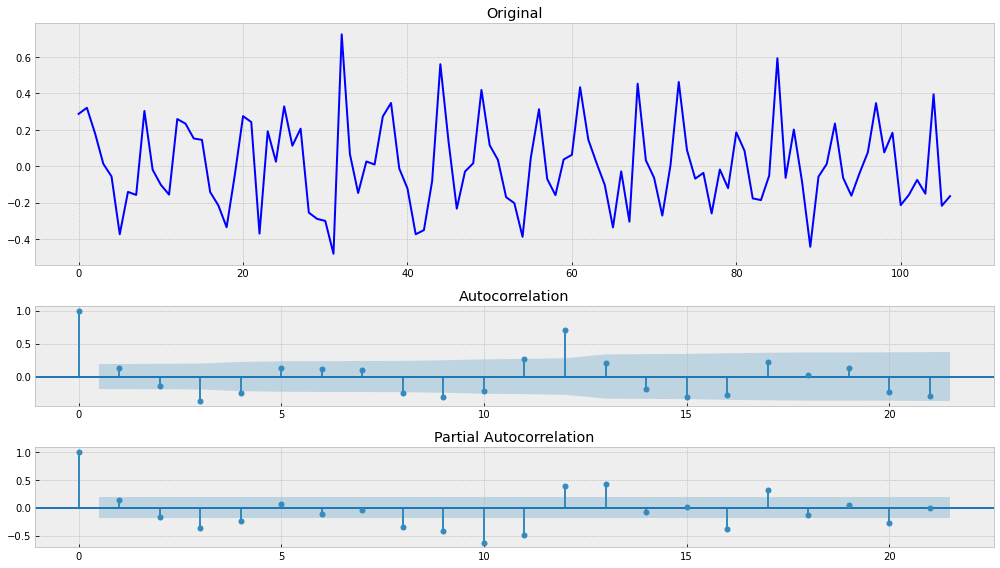

In [120]:
for s in all_series:
    series = boxcox(all_series[s], 0)
    series_diff = np.diff(series, 1)
    tsplot(series_diff)

Коррелограммы также подтверждают, что мы получили стационарные временные ряды